# Leaderles collective motion s in affine formation control
Creamos los agentes en las posiciones iniciales de referencia
Estos son los nodos:
$p={(-1,1),(0,1),(1,1),(2,0),(1,-1),(0,-1),(-1,-1),(-2,0)}$
Y estos son los arcos del grafo
$Z={(1,2),(1,3),(1,4),(1,5),(2,4),(2,7),(3,5),(3,6),/4,5),(4,6),(5,7),(6,8),(7,8),(4,8),(5,8)}$
Y agrupamos todas las posiciones en un vector $p \in R^m$
Las dibujamos y dibujamos también el grafo

Posiciones iniciales de los agentes: [[-1.  1.]
 [ 0.  1.]
 [ 1.  1.]
 [ 2.  0.]
 [ 1. -1.]
 [ 0. -1.]
 [-1. -1.]
 [-2.  0.]]
[[-1.  1.]
 [ 0.  1.]]
[[-1.  1.]
 [ 1.  1.]]
[[-1.  1.]
 [ 2.  0.]]
[[-1.  1.]
 [ 1. -1.]]
[[0. 1.]
 [2. 0.]]
[[ 0.  1.]
 [-1. -1.]]
[[ 1.  1.]
 [ 1. -1.]]
[[ 1.  1.]
 [ 0. -1.]]
[[ 2.  0.]
 [ 1. -1.]]
[[ 2.  0.]
 [ 0. -1.]]
[[ 1. -1.]
 [-1. -1.]]
[[ 0. -1.]
 [-2.  0.]]
[[-1. -1.]
 [-2.  0.]]
[[ 2.  0.]
 [-2.  0.]]


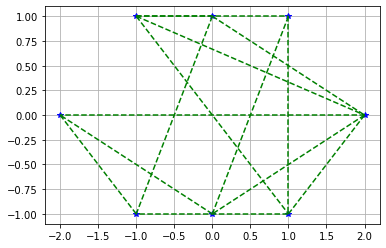

In [3]:
import RobotModels as rob
import robot_plot_utils as rplot
import numpy as np
import matplotlib.pyplot as plt
import graph_utils as graf


p=np.array([-1,1,0,1,1,1,2,0,1,-1,0,-1,-1,-1,-2,0])
Z=np.array([[1,1,1,1,2,2,3,3,4,4,5,6,7,4,5],
            [2,3,4,5,4,7,5,6,5,6,7,8,8,8,8]])
npuntos=int(p.size/2)
p_dib=np.zeros((npuntos,2))
j=0
for i in range(npuntos):
    p_dib[i,0]=p[j]
    p_dib[i,1]=p[j+1]
    j=j+2
print("Posiciones iniciales de los agentes:",p_dib)
plt.plot(p_dib[:,0],p_dib[:,1],'b*')
g=np.zeros([2,2])
#Grafo
rplot.dibuja_grafo_2D(p_dib,Z)
plt.grid()
plt.show()    

In [ ]:
## Matriz de incidencia del grafo y matriz laplaciana

## Controlador
El controlador es el siguiente:
$u_i=-h \sum_{j \in N_i}\hat\omega_{ij}(p_i-p_j)$

In [5]:
B=graf.matriz_incidencia(Z,8,15)
print("B:",B)
pesos=np.ones([8,8])
L=graf.matriz_laplaciana(Z,pesos,8,15)
print("L")
print(L)

B: [[ 1. -1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. -1.  0.  0.  0.  0.  0.]
 [ 1.  0.  0. -1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  1.  0. -1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  1.  0. -1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  1. -1.]
 [ 0.  0.  0.  1.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  1.  0.  0. -1.]]
L
[[ 4. -1. -1. -1. -1.  0.  0.  0.]
 [ 0.  2.  0. -1.  0.  0. -1.  0.]
 [ 0.  0.  2.  0. -1. -1.  0.  0.]
 [ 0.  0.  0.  3. -1. -1.  0. -1.]
 [ 0.  0.  0.  0.  2.  0. -1. -1.]
 [ 0.  0.  0.  0.  0.  1.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


Podemos escribit el controlado en forma compacta
$u_i=-h\bar L p$
Para que la formación converja a la deseada asintóticamente vamos a modificar lo siguiente:
1. los pesos de la siguiente manera:
$\tilde{\omega_{ij}}=\omega_{ij}-\frac{\kappa}{h}\mu_{ij}$
donde $\mu_{ij}$ se llaman *parámetros de movimiento* y $\kappa$ regula la velocidad del movimiento colectivo y $h$ es la ganancia
2. La matriz laplaciana $\tilde{L}=L-\frac{\kappa}{h}MB^T$
3. La *base* $M$ que tendrá las matrices $M_t_{1,2},M_r,M_s,M_s_{1,2} \in R^{\vbar \nu \vbar x \vbar Z \vbar}$  cuyos componentes están definidos como
el parámetro de movimiento si es cabeza de arco, menos el parámetro si es cola o 0 en otro caso.

### Cálculo de los parámetros de movimiento
Los parámeros de movimiento $\mu_{ij}$ se calculan de manera que satisfagan la siguiente restricción:
$^bv^*_i=\sum_{j \in N_i}\mi_{ij}(^bp^*_i-^bp^*_j)$
donde $^bv^*_i \in R^m$ es la velocidad deseada de cada agente *i*  
Si la expresamos en forma matricial obtenemos:
    

In [19]:
uno_n=np.ones([2,1])
vt=np.zeros([15,1])
for i in range(0, 14,2):
    vt[i]=1
#print(uno_n)
#print(vt)
kp=np.kron(uno_n,vt)
#print(kp)
Im=np.eye(2)
B_var=np.kron(B,Im)
A=B_var*p
print("B: ", np.shape(B))
print("Im: ",np.shape(Im))
print("A: ", np.shape(A))
print("kp: ",np.shape(kp))
#mu=np.linalg.lstsq(A,kp)
#print("mu: ",mu)
#print("mu size: ",np.shape(mu))

B:  (15, 8)
Im:  (2, 2)
A:  (30, 16)
kp:  (30, 1)


*No tengo muy claro cómo resolver este sistema para obtener las matrices M de forma genérica* podría hacerlo sin problemas para el caso concreto pero no veo cómo hacerlo general.